In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
print("hello world")

hello world


In [3]:
ls

hello.md  Makefile  Makefile~  simulation-data.ipynb


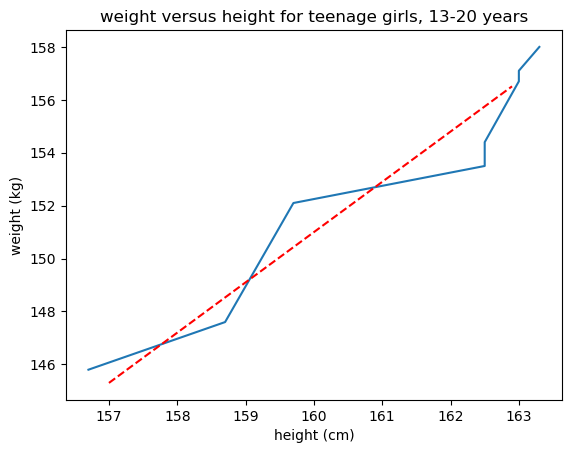

In [9]:
import matplotlib.pyplot as plt
weight = [45.8,47.6,52.1,53.5,54.4,56.7,57.1,58.0]
weight = [145.8,147.6,152.1,153.5,154.4,156.7,157.1,158.0]
height = [156.7,158.7, 159.7,162.5,162.5,163,163,163.3]

plt.plot(height,weight)
plt.title("weight versus height for teenage girls, 13-20 years")
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# plot a function
import numpy as np
h = np.arange(157., 163., .1)
w = 1.9 * h -153
# red dashes, blue squares and green triangles
plt.plot(h, w, 'r--')

# this is a mimic of linear regression/linear fit

In [8]:
- 270 + 17+100

-153